1. Preproceso de los datos - Quita missing values - borro renglones o no los borro- 
2. Ingenieria de la caracteristicas - Variables que voy a utilizar
3. Trabajar el tema del balanceo de los datos
3. Modelacion Capitulo 7
4. Evaluacion y prediccion Capitulo (Curva ROC)
5. Prediccion



Con las bases de datos que se le suministrarán se pide construir un modelo predictivo que retorne la probabilidad de que una cotización de una placa finalice el flujo con la compra exitosa del seguro.

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import warnings
from sklearn.metrics import brier_score_loss
warnings.filterwarnings("ignore")

### 1. Analisis y preparacion de los datos

In [2]:
data = pd.read_excel('transacciones.xlsx')  
demograficos = pd.read_excel('Datos demográficos.xlsx')   

df = data

In [3]:
df = data
df2 = demograficos

In [4]:
df.head()

,Fecha,browserFamily,browserType,city,country,duration,endTime,osFamily,osVersion,region,startTime,PasoMax,Canales,TipoVeh,NumCanales,Placa_Id
0,2018-05-31,Chrome,Desktop Browser,BogotÃ¡,Colombia,78,2018-05-31 18:16:00,Windows,Windows 8.1,Bogota D.C.,2018-05-31 18:15:00,Datos,alkosto,Moto,1,2145
1,2018-05-31,Chrome Mobile,Mobile Browser,BogotÃ¡,Colombia,130,2018-05-31 22:21:00,Android,Android 9.0 Pie,Bogota D.C.,2018-05-31 22:18:00,Datos,exito,Moto,1,2145
2,2018-06-03,Edge,Desktop Browser,BogotÃ¡,Colombia,92,2018-06-03 16:46:00,Windows,Windows 10,Bogota D.C.,2018-06-03 16:44:00,Datos,bancolombia,Moto,1,2146
3,2018-06-03,Chrome,Desktop Browser,Barranquilla,Colombia,49,2018-06-03 08:43:00,Windows,Windows 7,AtlÃ¡ntico,2018-06-03 08:42:00,Datos,sura,Moto,1,2147
4,2018-06-04,Chrome,Desktop Browser,Acevedo,Colombia,28,2018-06-04 16:56:00,Windows,Windows 10,Departamento del Huila,2018-06-04 16:56:00,Datos,exito,Moto,1,2148


In [5]:
df.columns

Index(['Fecha', 'browserFamily', 'browserType', 'city', 'country', 'duration',
       'endTime', 'osFamily', 'osVersion', 'region', 'startTime', 'PasoMax',
       'Canales', 'TipoVeh', 'NumCanales', 'Placa_Id'],
      dtype='object')

In [6]:
df = df[['Fecha', 'browserFamily', 'browserType', 'city', 'country', 'duration',
       'endTime', 'osFamily', 'osVersion', 'region', 'startTime',
       'Canales', 'TipoVeh', 'NumCanales', 'Placa_Id','PasoMax']]

Datos               44779
Pagos Pendientes     3228
Pagos Exitosos       2852
Pagos Rechazados      439
Cotizacion             44
Name: PasoMax, dtype: int64


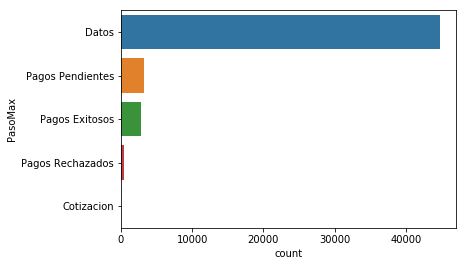

In [7]:
sns.countplot(y='PasoMax', data=df)
print(df['PasoMax'].value_counts())

Carro    35165
Moto     15914
Name: TipoVeh, dtype: int64


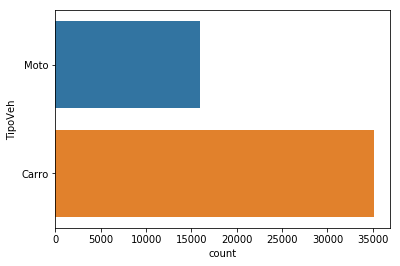

In [8]:
sns.countplot(y='TipoVeh', data=df)
print(df['TipoVeh'].value_counts())

In [9]:
# Valores nullos a eliminar
print("Filas de la tabla ", len(df))
print("Valores nulos ", df.isnull().values.sum())
print(df.isnull().values.sum()/len(df)*100)

Filas de la tabla  51358
Valores nulos  823
1.60247673196


In [10]:
df= df.replace('?', np.nan)
df= df.replace('-1', np.nan)
df.isnull().mean().sort_values(ascending=True)

Fecha            0.000000
browserFamily    0.000000
browserType      0.000000
city             0.000000
country          0.000000
duration         0.000000
endTime          0.000000
osFamily         0.000000
osVersion        0.000000
region           0.000000
startTime        0.000000
NumCanales       0.000000
Placa_Id         0.000000
PasoMax          0.000312
TipoVeh          0.005432
Canales          0.010281
dtype: float64

In [11]:
df = df.dropna()

In [12]:
len(df)

50558

In [13]:
# Variable logistica dummy

df['Exito'] = np.where(df['PasoMax']== 'Pagos Exitosos', 1, 0)

In [15]:
#variable_categorica = ['TipoVeh']

df = pd.get_dummies(df, columns=["TipoVeh"])

In [16]:
# Limpieza de datos

df= df.replace(['tu','https://www.suraenlinea.com','exitocom'],['tuya','sura','exito'])

In [17]:
df[['Canal1','Canal2','Canal3','Canal4','Canal5','Canal6']] = df.Canales.str.split(",",expand=True,)


In [18]:
medio = ['alkosto','exito','bancolombia','sura','bancodeoccidente','clickam','alkomprar','carulla','sufi',
         'colsubsidio','tuya','empleadossura','flypass','euro']

In [19]:
for i in medio:
    df[i] = np.where((df['Canal1'] == i)|(df['Canal2'] == i)|(df['Canal3'] == i)|(df['Canal4'] == i )| (df['Canal5']==i) |(df['Canal6']==i),1,0)
     

In [21]:
df.columns

Index(['Fecha', 'browserFamily', 'browserType', 'city', 'country', 'duration',
       'endTime', 'osFamily', 'osVersion', 'region', 'startTime', 'Canales',
       'NumCanales', 'Placa_Id', 'PasoMax', 'Exito', 'TipoVeh_Carro',
       'TipoVeh_Moto', 'Canal1', 'Canal2', 'Canal3', 'Canal4', 'Canal5',
       'Canal6', 'alkosto', 'exito', 'bancolombia', 'sura', 'bancodeoccidente',
       'clickam', 'alkomprar', 'carulla', 'sufi', 'colsubsidio', 'tuya',
       'empleadossura', 'flypass', 'euro'],
      dtype='object')

In [81]:
for i in medio:
    df[i] = np.where((df['Canal1'] == i)|(df['Canal2'] == i)|(df['Canal3'] == i)|(df['Canal4'] == i )| (df['canal5']==i) |(df['Canal6']==i),1,0)
     


In [22]:
df = df.drop(['Canal1', 'Canal2', 'Canal3','Canal4','Canal5','Canal6'], axis=1)

In [23]:
df.columns

Index(['Fecha', 'browserFamily', 'browserType', 'city', 'country', 'duration',
       'endTime', 'osFamily', 'osVersion', 'region', 'startTime', 'Canales',
       'NumCanales', 'Placa_Id', 'PasoMax', 'Exito', 'TipoVeh_Carro',
       'TipoVeh_Moto', 'alkosto', 'exito', 'bancolombia', 'sura',
       'bancodeoccidente', 'clickam', 'alkomprar', 'carulla', 'sufi',
       'colsubsidio', 'tuya', 'empleadossura', 'flypass', 'euro'],
      dtype='object')

In [150]:
# Para exportar lo que llevo

#df.to_csv("exporte1.csv")

In [24]:
count_ciudad = df['city'].value_counts().to_dict()
count_region = df['region'].value_counts().to_dict()


In [25]:
ordinal_ciudad = {k: i for i, k in enumerate(df['city'], 0)}
ordinal_region = {k: i for i, k in enumerate(df['region'], 0)}
ordinal_browser = {k: i for i, k in enumerate(df['browserFamily'], 0)}
ordinal_os_family = {k: i for i, k in enumerate(df['osVersion'], 0)}
ordinal_country = {k: i for i, k in enumerate(df['country'], 0)}

In [26]:
df['xcity'] = df['city'].map(ordinal_ciudad)
df['xregion'] = df['region'].map(ordinal_region)
df['xbrowserFamily'] = df['browserFamily'].map(ordinal_browser)
df['xosVersion'] = df['osVersion'].map(ordinal_os_family)
df['xcountry'] = df['country'].map(ordinal_country)

In [27]:
df.columns

Index(['Fecha', 'browserFamily', 'browserType', 'city', 'country', 'duration',
       'endTime', 'osFamily', 'osVersion', 'region', 'startTime', 'Canales',
       'NumCanales', 'Placa_Id', 'PasoMax', 'Exito', 'TipoVeh_Carro',
       'TipoVeh_Moto', 'alkosto', 'exito', 'bancolombia', 'sura',
       'bancodeoccidente', 'clickam', 'alkomprar', 'carulla', 'sufi',
       'colsubsidio', 'tuya', 'empleadossura', 'flypass', 'euro', 'xcity',
       'xregion', 'xbrowserFamily', 'xosVersion', 'xcountry'],
      dtype='object')

In [28]:
dfmodelo = df[['xregion', 'xbrowserFamily', 'xosVersion', 'xcountry','NumCanales','TipoVeh_Carro',
       'TipoVeh_Moto','alkosto', 'exito', 'bancolombia', 'sura',
       'bancodeoccidente', 'clickam', 'alkomprar', 'carulla', 'sufi',
       'colsubsidio', 'tuya', 'empleadossura', 'flypass', 'euro','Exito']]

### Modelo

<img src="ensemble.jpg" width="800" height="400">

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(dfmodelo, dfmodelo['Exito'],
                                                    test_size=0.2,
                                                    random_state=0)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40446, 22), (10112, 22), (40446,), (10112,))

In [38]:
X_train.drop(['Exito'], axis=1, inplace=True)
X_test.drop(['Exito',], axis=1, inplace=True)

In [39]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
 voting='hard')
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFo...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [40]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
 

LogisticRegression 0.946993670886
RandomForestClassifier 0.944422468354
SVC 0.946993670886
VotingClassifier 0.946993670886


In [45]:
loss

0.050221202926427767

In [46]:
probas = log_clf.predict_proba(X_test)
n_classes = np.unique(y_test).size

In [47]:
probas

array([[ 0.9430133 ,  0.0569867 ],
       [ 0.94295395,  0.05704605],
       [ 0.94325896,  0.05674104],
       ..., 
       [ 0.9429529 ,  0.0570471 ],
       [ 0.94294073,  0.05705927],
       [ 0.94295253,  0.05704747]])

In [50]:
y_test

19133    0
15417    0
28699    0
2637     0
12761    0
15399    0
12992    0
29117    0
25301    0
23342    0
25865    0
27201    0
5544     0
28986    0
48113    0
26433    0
14410    0
26641    1
50535    0
24244    0
30534    0
13240    1
31307    0
20398    0
31972    0
14823    0
24236    0
23527    0
16621    0
9705     0
        ..
33013    0
48526    0
36774    0
20167    1
7529     0
13027    0
2338     0
37258    0
16481    0
2437     0
9539     0
47899    0
23436    0
39011    0
45506    0
18592    0
15914    0
12542    1
44263    0
6435     0
46232    1
7083     0
31767    0
20014    0
26407    0
16684    0
38980    0
10423    0
6305     0
39475    0
Name: Exito, Length: 10112, dtype: int64

In [52]:
X_test.head(10)

,xregion,xbrowserFamily,xosVersion,xcountry,NumCanales,TipoVeh_Carro,TipoVeh_Moto,alkosto,exito,bancolombia,...,bancodeoccidente,clickam,alkomprar,carulla,sufi,colsubsidio,tuya,empleadossura,flypass,euro
19133,50420,50557,50549,50557,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
15417,50555,50555,50553,50557,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
28699,49876,50555,50555,50557,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2637,50555,50557,50502,50557,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12761,50555,50555,50553,50557,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15399,50557,50551,50551,50557,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12992,50555,50555,50553,50557,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29117,50557,50555,50553,50557,2,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
25301,50557,50557,50549,50557,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23342,50537,50557,50557,50557,2,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [55]:
import xlsxwriter

workbook = xlsxwriter.Workbook('arrays.xlsx')
worksheet = workbook.add_worksheet()

row = 0

for col, data in enumerate(probas):
    worksheet.write_column(row, col, data)

workbook.close()

In [54]:
!pip install xlsxwriter

    100% |████████████████████████████████| 153kB 2.1MB/s ta 0:00:01
